
# 1. Preparation

## Importing Libraries

In [15]:
#import numpy as np
import numpy as np
#importing tensorflow for CIFAR-10 dataset and CNN modelling
import tensorflow
from tensorflow.keras import datasets, layers, models, callbacks
#pandas used to create dataframe tables
import pandas as pd
#matplotlib for visualising images
import matplotlib.pyplot as plt

## Loading training dataset

In [3]:
# dataset loader code from source [1]
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
### end of source 1
# source [1] https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/16_cnn_cifar10_small_image_classification/cnn_cifar10_dataset.ipynb

In [4]:
#Here we see that the training data is 50,000 images of size 32x32x3 and test data is 10000
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


### Reformatting results array

In [5]:
#results are in 2d array
y_train[0:2]

array([[6],
       [9]], dtype=uint8)

In [6]:
#reformatting results to 1d array
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train[0:2]

array([6, 9], dtype=uint8)

In [7]:
#defining labels and matching them to resluts numbers
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
#testing results
[classes[y_train[0]],classes[y_train[1]]]

['frog', 'truck']

### Normalising input data

In [8]:
#Normalising training data from ranging from 0 to 255, to ranging from 0 to 1
X_train = X_train / 255
X_test = X_test / 255

# 2. Artificial Network Training (Attempt One)

In [29]:
# Artificial Neural Network training template code from source [1]
ann1 = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann1.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann1.fit(X_train, y_train, epochs=5)
### end of source 1

Epoch 1/5
50000/50000 [==============================] - 55s 1ms/sample - loss: 1.8137 - acc: 0.3518
Epoch 2/5
50000/50000 [==============================] - 54s 1ms/sample - loss: 1.6251 - acc: 0.4264
Epoch 3/5
50000/50000 [==============================] - 55s 1ms/sample - loss: 1.5432 - acc: 0.4564
Epoch 4/5
50000/50000 [==============================] - 54s 1ms/sample - loss: 1.4853 - acc: 0.4772
Epoch 5/5
50000/50000 [==============================] - 54s 1ms/sample - loss: 1.4358 - acc: 0.4956


## Evaluate

In [31]:
ann1.evaluate(X_test, y_test)

10000/10000 [==============================] - 3s 261us/sample - loss: 1.4627 - acc: 0.4737


[1.4627347240447999, 0.4737]

**After evaluating the network on training data you get a loss of ~1.46 and an accuracy of ~47%, this is very bad! (273s)**

# 3. Artificial Network Training (Attempt Two)

In [32]:
# Artificial Neural Network training template code from source [1]
ann2 = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(1500, activation='relu'),
        layers.Dense(800, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann2.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann2.fit(X_train, y_train, epochs=10)
### end of source 1

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
50000/50000 [==============================] - 33s 661us/sample - loss: 1.8727 - acc: 0.3292
Epoch 2/10
50000/50000 [==============================] - 33s 663us/sample - loss: 1.6727 - acc: 0.4079
Epoch 3/10
50000/50000 [==============================] - 33s 651us/sample - loss: 1.5832 - acc: 0.4417
Epoch 4/10
50000/50000 [==============================] - 33s 670us/sample - loss: 1.5236 - acc: 0.4603
Epoch 5/10
50000/50000 [==============================] - 33s 656us/sample - loss: 1.4744 - acc: 0.4776
Epoch 6/10
50000/50000 [==============================] - 33s 652us/sample - loss: 1.4301 - acc: 0.4963 - loss: 1.430 - ETA: 0s - loss: 1.4299 - acc: 
Epoch 7/10
50000/50000 [==============================] - 33s 665us/sample - loss: 1.3950 - acc: 0.5070
Epoch 8/10
50000/50000 [==============================] - 33s 652us/sample - loss: 1.3604 - acc: 0.5208
Epoch 9/10
50000/50000 [===

## Evaluate

In [39]:
ann2.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 220us/sample - loss: 1.4478 - acc: 0.4790


[1.4477914001464844, 0.479]

**After evaluating the network on training data you get a loss of ~1.43 and an accuracy of ~49%, this is not much different (300s)**

# 4. Convolutional Network Training (Attempt One)

In [40]:
# Convolutional Neural Network training template code from source [1]
#Building model
cnn1 = models.Sequential([
    #Convultion Layer
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    #Pooling Layer
    layers.MaxPooling2D((2, 2)),
    
    #Convolution Layer
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    #Pooling Layer
    layers.MaxPooling2D((2, 2)),
    
    #Flatten Layer flattens the input
    layers.Flatten(),
    #Deep layer with 64 deep neurons
    layers.Dense(64, activation='relu'),
    #Deep Layer with 10 softmax neurons, softmax used as it normalises output
    layers.Dense(10, activation='softmax')
])

# compiler code
cnn1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn1.fit(X_train, y_train, epochs=10)
### end of source 1

Epoch 1/10
50000/50000 [==============================] - 28s 561us/sample - loss: 1.4525 - acc: 0.4774
Epoch 2/10
50000/50000 [==============================] - 27s 547us/sample - loss: 1.1239 - acc: 0.6068
Epoch 3/10
50000/50000 [==============================] - 27s 543us/sample - loss: 0.9800 - acc: 0.6586 - loss: 0.9802 -  - ETA: 1s - loss: 0.9801 - ETA: 0s - loss: 0.980
Epoch 4/10
50000/50000 [==============================] - 28s 557us/sample - loss: 0.8951 - acc: 0.6883
Epoch 5/10
50000/50000 [==============================] - 27s 548us/sample - loss: 0.8275 - acc: 0.7135
Epoch 6/10
50000/50000 [==============================] - 27s 537us/sample - loss: 0.7711 - acc: 0.7309
Epoch 7/10
50000/50000 [==============================] - 26s 526us/sample - loss: 0.7140 - acc: 0.7503
Epoch 8/10
50000/50000 [==============================] - 27s 537us/sample - loss: 0.6683 - acc: 0.7664
Epoch 9/10
50000/50000 [==============================] - 26s 525us/sample - loss: 0.6218 - acc: 0.78

## Evaluate

In [42]:
cnn1.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 173us/sample - loss: 1.0487 - acc: 0.6666


[1.0487308279037475, 0.6666]

**Great performance in low time compared previous attemps**

# 5. Convolutional Network Training (Attempt Two)

In [43]:
#Building model
cnn2 = models.Sequential([
    #Convultion Layer
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    #Pooling Layer
    layers.MaxPooling2D((2, 2)),
    
    #Convolution Layer
    layers.Conv2D(filters=96, kernel_size=(3, 3), activation='relu'),
    #Pooling Layer
    layers.MaxPooling2D((2, 2)),
    
    #Flatten Layer flattens the input
    layers.Flatten(),
    #Deep layer with 64 deep neurons
    layers.Dense(64, activation='relu'),
    #Deep Layer with 10 softmax neurons, softmax used as it normalises output
    layers.Dense(10, activation='softmax')
])

#compiler code
cnn2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn2.fit(X_train, y_train, epochs=12)

Epoch 1/12
50000/50000 [==============================] - 49s 986us/sample - loss: 1.4864 - acc: 0.4629
Epoch 2/12
50000/50000 [==============================] - 49s 973us/sample - loss: 1.1224 - acc: 0.6054
Epoch 3/12
50000/50000 [==============================] - 51s 1ms/sample - loss: 0.9799 - acc: 0.65911s - loss:
Epoch 4/12
50000/50000 [==============================] - 49s 986us/sample - loss: 0.8924 - acc: 0.6915
Epoch 5/12
50000/50000 [==============================] - 51s 1ms/sample - loss: 0.8302 - acc: 0.7137
Epoch 6/12
50000/50000 [==============================] - 48s 966us/sample - loss: 0.7758 - acc: 0.7306
Epoch 7/12
50000/50000 [==============================] - 48s 960us/sample - loss: 0.7287 - acc: 0.7468
Epoch 8/12
50000/50000 [==============================] - 49s 988us/sample - loss: 0.6860 - acc: 0.7609 - loss: 0.6856 
Epoch 9/12
50000/50000 [==============================] - 48s 954us/sample - loss: 0.6529 - acc: 0.7728
Epoch 10/12
50000/50000 [=================

## Evaluate

In [44]:
cnn2.evaluate(X_test,y_test)

10000/10000 [==============================] - 3s 266us/sample - loss: 0.9857 - acc: 0.6932


[0.9857074790000916, 0.6932]

**Good performance still but took much longer to complete with negligble difference to performance**

# 6. Convolutional Network Training (Attempt Three)

In [45]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

# This callback will stop the training when there is less than 1% improvement in accuracy for 3 epochs in a row
callback = callbacks.EarlyStopping(monitor='loss', min_delta=0.02, patience=2)

# modified cross validation code from source [2]
#Building model
def build_classifier():
    cnn3 = models.Sequential([
        #Convultion Layer
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
        #Pooling Layer
        layers.MaxPooling2D((2, 2)),

        #Convolution Layer
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        #Pooling Layer
        layers.MaxPooling2D((2, 2)),

        #Flatten Layer flattens the input
        layers.Flatten(),
        #Deep layer with 64 deep neurons
        layers.Dense(64, activation='relu'),
        #Deep layer with 64 deep neurons
        layers.Dense(10, activation='softmax')
    ])

classifier = KerasClassifier(build_fn = build_classifier, batch_size = 1, epochs=20)
accuracies = cross_val_score(estimator = classifier, X=X_train, y=y_train, cv=5, n_jobs=-1)

### end of source 2
# source [2]

#compiler code
cnn3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn3.fit(X_train, y_train, epochs=20, callbacks=[callback])

Epoch 1/20
50000/50000 [==============================] - 28s 564us/sample - loss: 0.2744 - acc: 0.9003
Epoch 2/20
50000/50000 [==============================] - 29s 574us/sample - loss: 0.2600 - acc: 0.9067
Epoch 3/20
50000/50000 [==============================] - 28s 565us/sample - loss: 0.2566 - acc: 0.9086


In [46]:
cnn3.evaluate(X_test,y_test)

10000/10000 [==============================] - 2s 187us/sample - loss: 1.6713 - acc: 0.6713


[1.671295638179779, 0.6713]

# 7. Extra Evaluation

## Defining functions and methods for visualising and analysing results

In [47]:
y_pred1 = ann1.predict(X_test)
y_pred2 = ann2.predict(X_test)
y_pred3 = cnn1.predict(X_test)
y_pred4 = cnn2.predict(X_test)
y_pred5 = cnn3.predict(X_test)

In [48]:
#defining function that takes some input 2d list (u) and returns index of the max value inside each nested list
def MaxyIndex(u):
    y_classes = []
    for i in range(len(u)):
        max_pred = -1
        max_pred_index = 0
        for j in range(len(u[0])):
            if u[i][j] > max_pred:
                max_pred = u[i][j]
                max_pred_index = j
        y_classes.append(max_pred_index)
    return y_classes

#using function on probabilities of each class prediction from neural nets
y_classes1 = MaxyIndex(y_pred1)
y_classes2 = MaxyIndex(y_pred2)
y_classes3 = MaxyIndex(y_pred3)
y_classes4 = MaxyIndex(y_pred4)
y_classes5 = MaxyIndex(y_pred5)

In [49]:
#first five predictions
for i in range(5):
    print(str(i+1) +": " + str(classes[y_classes1[i]]))

1: cat
2: ship
3: ship
4: ship
5: deer


In [50]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1])

In [51]:
y_classes1[:10]

[3, 8, 8, 8, 4, 6, 3, 4, 4, 1]

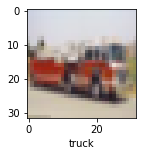

In [52]:
#function for plotting any sample from the dataset
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
plot_sample(X_test, y_classes1,8000)

In [58]:
# function for return quantites of each class classified by neural nets
def Qcounter(y_test):
    quant_list = np.zeros(10, dtype = int)
    for i in range(len(y_test)):
            if (y_test[i] == 0):
                quant_list[0] += 1
            elif (y_test[i] == 1):
                quant_list[1] += 1    
            elif (y_test[i] == 2):
                quant_list[2] += 1
            elif (y_test[i] == 3):
                quant_list[3] += 1
            elif (y_test[i] == 4):
                quant_list[4] += 1
            elif (y_test[i] == 5):
                quant_list[5] += 1
            elif (y_test[i] == 6):
                quant_list[6] += 1
            elif (y_test[i] == 7):
                quant_list[7] += 1
            elif (y_test[i] == 8):
                quant_list[8] += 1
            elif (y_test[i] == 9):
                quant_list[9] += 1
    return quant_list

In [54]:
from sklearn.metrics import confusion_matrix, classification_report
# importing confusion matrix and classification report for evaluation purposes

## ANN 1

In [55]:
# total test data vs predicted data
pd.DataFrame(data=[QCounter(y_test), QCounter(y_classes1)], index=["Test Data", "Predicted Data"], columns=classes)

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
Test Data,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
Predicted Data,485,662,594,1209,1303,1088,1229,803,1625,1002


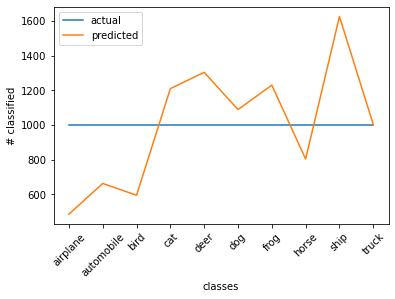

In [68]:
# graph that shows predicted vs actual for classes 0 to 9
fig, ax = plt.subplots()
x = np.linspace(0, 9, 10)
y = Qcounter(y_test)
plt.plot(x, y, label = "actual")
y = Qcounter(y_classes1)
plt.plot(x, y, label = "predicted")
# setting labels
ax.set_ylabel('# classified')
ax.set_xlabel('classes')

#setting x tick
plt.xticks(x, classes, rotation=45)

plt.legend()
plt.show()

In [61]:
# classification report
print(classification_report(y_test,y_classes1))

              precision    recall  f1-score   support

           0       0.71      0.34      0.46      1000
           1       0.68      0.45      0.54      1000
           2       0.43      0.25      0.32      1000
           3       0.30      0.37      0.33      1000
           4       0.38      0.50      0.43      1000
           5       0.37      0.41      0.39      1000
           6       0.49      0.60      0.54      1000
           7       0.61      0.49      0.54      1000
           8       0.47      0.77      0.58      1000
           9       0.56      0.56      0.56      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.47     10000
weighted avg       0.50      0.47      0.47     10000



In [62]:
# dataframe confusion matrix
CM_columns = []
CM_index = []
for i in range(len(classes)):
    CM_columns.append('Predicted '+ classes[i])
    CM_index.append('Actual '+ classes[i])

pd.DataFrame(data=confusion_matrix(y_test, y_classes1),index=CM_index,columns=CM_columns)

,Predicted airplane,Predicted automobile,Predicted bird,Predicted cat,Predicted deer,Predicted dog,Predicted frog,Predicted horse,Predicted ship,Predicted truck
Actual airplane,342,20,70,65,66,21,29,33,319,35
Actual automobile,14,452,9,50,23,37,19,24,161,211
Actual bird,45,18,254,133,220,101,123,46,48,12
Actual cat,7,10,44,367,72,246,143,28,37,46
Actual deer,21,8,71,76,500,71,135,58,51,9
Actual dog,3,6,63,225,95,405,91,50,43,19
Actual frog,1,10,19,104,156,55,604,18,21,12
Actual horse,13,15,42,86,124,101,43,491,37,48
Actual ship,24,29,16,39,25,23,14,12,765,53
Actual truck,15,94,6,64,22,28,28,43,143,557


## ANN 2

In [63]:
# total test data vs predicted data
pd.DataFrame(data=[QCounter(y_test), QCounter(y_classes2)], index=["Test Data", "Predicted Data"], columns=classes)

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
Test Data,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
Predicted Data,800,1288,1401,703,1882,322,954,619,1583,448


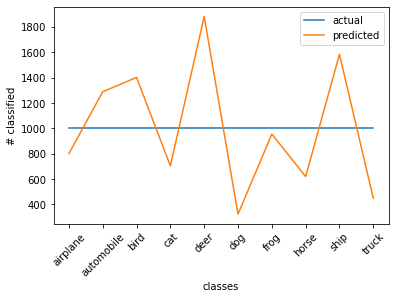

In [70]:
# graph that shows predicted vs actual for classes 0 to 9
fig, ax = plt.subplots()
x = np.linspace(0, 9, 10)
y = Qcounter(y_test)
plt.plot(x, y, label = "actual")
y = Qcounter(y_classes2)
plt.plot(x, y, label = "predicted")
# setting labels
ax.set_ylabel('# classified')
ax.set_xlabel('classes')

#setting x tick
plt.xticks(x, classes, rotation=45)

plt.legend()
plt.show()

In [71]:
# classification report
print(classification_report(y_test,y_classes2))

              precision    recall  f1-score   support

           0       0.61      0.49      0.54      1000
           1       0.56      0.72      0.63      1000
           2       0.32      0.45      0.38      1000
           3       0.39      0.28      0.33      1000
           4       0.33      0.62      0.43      1000
           5       0.61      0.20      0.30      1000
           6       0.54      0.52      0.53      1000
           7       0.71      0.44      0.54      1000
           8       0.49      0.77      0.60      1000
           9       0.70      0.31      0.43      1000

    accuracy                           0.48     10000
   macro avg       0.53      0.48      0.47     10000
weighted avg       0.53      0.48      0.47     10000



In [72]:
# dataframe confusion matrix
CM_columns = []
CM_index = []
for i in range(len(classes)):
    CM_columns.append('Predicted '+ classes[i])
    CM_index.append('Actual '+ classes[i])

pd.DataFrame(data=confusion_matrix(y_test, y_classes2),index=CM_index,columns=CM_columns)

,Predicted airplane,Predicted automobile,Predicted bird,Predicted cat,Predicted deer,Predicted dog,Predicted frog,Predicted horse,Predicted ship,Predicted truck
Actual airplane,486,42,121,7,63,3,16,11,244,7
Actual automobile,30,719,21,10,27,2,15,12,125,39
Actual bird,58,22,451,49,257,19,73,24,43,4
Actual cat,28,41,170,277,184,54,132,28,60,26
Actual deer,37,19,160,28,622,8,58,23,44,1
Actual dog,14,19,183,202,181,196,84,48,60,13
Actual frog,6,26,119,39,246,8,518,6,27,5
Actual horse,38,19,114,62,223,23,22,440,36,23
Actual ship,58,63,26,11,37,2,10,6,769,18
Actual truck,45,318,36,18,42,7,26,21,175,312


## CNN 1

In [73]:
# total test data vs predicted data
pd.DataFrame(data=[QCounter(y_test), QCounter(y_classes3)], index=["Test Data", "Predicted Data"], columns=classes)

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
Test Data,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
Predicted Data,868,784,682,1422,1546,876,805,1100,884,1033


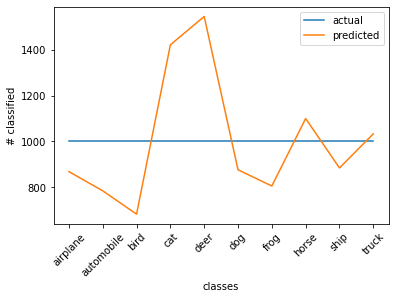

In [74]:
# graph that shows predicted vs actual for classes 0 to 9
fig, ax = plt.subplots()
x = np.linspace(0, 9, 10)
y = Qcounter(y_test)
plt.plot(x, y, label = "actual")
y = Qcounter(y_classes3)
plt.plot(x, y, label = "predicted")
# setting labels
ax.set_ylabel('# classified')
ax.set_xlabel('classes')

#setting x tick
plt.xticks(x, classes, rotation=45)

plt.legend()
plt.show()

In [75]:
# classification report
print(classification_report(y_test,y_classes5))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71      1000
           1       0.76      0.81      0.79      1000
           2       0.58      0.56      0.57      1000
           3       0.47      0.48      0.47      1000
           4       0.63      0.59      0.61      1000
           5       0.54      0.63      0.58      1000
           6       0.73      0.78      0.75      1000
           7       0.70      0.70      0.70      1000
           8       0.81      0.79      0.80      1000
           9       0.81      0.69      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



In [76]:
# dataframe confusion matrix
CM_columns = []
CM_index = []
for i in range(len(classes)):
    CM_columns.append('Predicted '+ classes[i])
    CM_index.append('Actual '+ classes[i])

pd.DataFrame(data=confusion_matrix(y_test, y_classes3),index=CM_index,columns=CM_columns)

,Predicted airplane,Predicted automobile,Predicted bird,Predicted cat,Predicted deer,Predicted dog,Predicted frog,Predicted horse,Predicted ship,Predicted truck
Actual airplane,673,9,45,54,59,18,9,24,64,45
Actual automobile,24,698,12,35,15,13,10,22,35,136
Actual bird,49,3,452,127,212,51,41,46,8,11
Actual cat,7,5,34,593,125,145,30,47,6,8
Actual deer,9,1,20,76,779,25,19,65,3,3
Actual dog,9,0,31,269,83,524,14,66,4,0
Actual frog,3,2,45,109,124,31,661,15,3,7
Actual horse,7,0,19,57,100,41,4,767,1,4
Actual ship,67,20,11,58,31,13,11,11,739,39
Actual truck,20,46,13,44,18,15,6,37,21,780


## CNN 2

In [77]:
# total test data vs predicted data
pd.DataFrame(data=[QCounter(y_test), QCounter(y_classes4)], index=["Test Data", "Predicted Data"], columns=classes)

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
Test Data,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
Predicted Data,894,778,913,1060,1127,1361,969,850,1019,1029


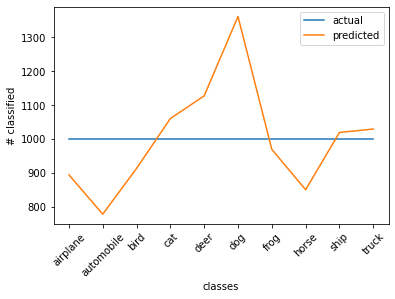

In [78]:
# graph that shows predicted vs actual for classes 0 to 9
fig, ax = plt.subplots()
x = np.linspace(0, 9, 10)
y = Qcounter(y_test)
plt.plot(x, y, label = "actual")
y = Qcounter(y_classes4)
plt.plot(x, y, label = "predicted")
# setting labels
ax.set_ylabel('# classified')
ax.set_xlabel('classes')

#setting x tick
plt.xticks(x, classes, rotation=45)

plt.legend()
plt.show()

In [79]:
# classification report
print(classification_report(y_test,y_classes4))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75      1000
           1       0.90      0.70      0.79      1000
           2       0.63      0.58      0.60      1000
           3       0.49      0.52      0.50      1000
           4       0.60      0.68      0.64      1000
           5       0.51      0.69      0.58      1000
           6       0.78      0.75      0.76      1000
           7       0.80      0.68      0.74      1000
           8       0.81      0.83      0.82      1000
           9       0.78      0.80      0.79      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.69      0.70     10000
weighted avg       0.71      0.69      0.70     10000



In [80]:
# dataframe confusion matrix
CM_columns = []
CM_index = []
for i in range(len(classes)):
    CM_columns.append('Predicted '+ classes[i])
    CM_index.append('Actual '+ classes[i])

pd.DataFrame(data=confusion_matrix(y_test, y_classes4),index=CM_index,columns=CM_columns)

,Predicted airplane,Predicted automobile,Predicted bird,Predicted cat,Predicted deer,Predicted dog,Predicted frog,Predicted horse,Predicted ship,Predicted truck
Actual airplane,709,10,59,27,34,20,15,16,66,44
Actual automobile,25,701,11,33,10,24,15,7,41,133
Actual bird,40,1,578,75,98,103,55,29,14,7
Actual cat,18,2,56,518,79,233,50,22,10,12
Actual deer,9,0,67,79,676,74,36,45,13,1
Actual dog,6,1,34,161,49,690,20,28,6,5
Actual frog,3,1,52,63,77,37,753,2,10,2
Actual horse,10,1,31,51,78,132,4,681,2,10
Actual ship,47,18,16,31,13,18,8,4,828,17
Actual truck,27,43,9,22,13,30,13,16,29,798


## CNN 3

In [81]:
# total test data vs predicted data
pd.DataFrame(data=[QCounter(y_test), QCounter(y_classes5)], index=["Test Data", "Predicted Data"], columns=classes)

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
Test Data,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
Predicted Data,972,1058,952,1019,929,1165,1066,1001,983,855


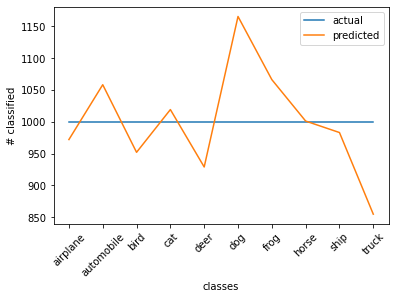

In [82]:
# graph that shows predicted vs actual for classes 0 to 9
fig, ax = plt.subplots()
x = np.linspace(0, 9, 10)
y = Qcounter(y_test)
plt.plot(x, y, label = "actual")
y = Qcounter(y_classes5)
plt.plot(x, y, label = "predicted")
# setting labels
ax.set_ylabel('# classified')
ax.set_xlabel('classes')

#setting x tick
plt.xticks(x, classes, rotation=45)

plt.legend()
plt.show()

In [83]:
# classification report
print(classification_report(y_test,y_classes3))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72      1000
           1       0.89      0.70      0.78      1000
           2       0.66      0.45      0.54      1000
           3       0.42      0.59      0.49      1000
           4       0.50      0.78      0.61      1000
           5       0.60      0.52      0.56      1000
           6       0.82      0.66      0.73      1000
           7       0.70      0.77      0.73      1000
           8       0.84      0.74      0.78      1000
           9       0.76      0.78      0.77      1000

    accuracy                           0.67     10000
   macro avg       0.70      0.67      0.67     10000
weighted avg       0.70      0.67      0.67     10000



In [84]:
# dataframe confusion matrix
CM_columns = []
CM_index = []
for i in range(len(classes)):
    CM_columns.append('Predicted '+ classes[i])
    CM_index.append('Actual '+ classes[i])

pd.DataFrame(data=confusion_matrix(y_test, y_classes5),index=CM_index,columns=CM_columns)

,Predicted airplane,Predicted automobile,Predicted bird,Predicted cat,Predicted deer,Predicted dog,Predicted frog,Predicted horse,Predicted ship,Predicted truck
Actual airplane,701,25,66,27,23,16,8,18,81,35
Actual automobile,24,808,18,14,3,12,8,15,30,68
Actual bird,59,6,555,80,72,90,78,39,14,7
Actual cat,26,12,51,479,70,219,67,53,9,14
Actual deer,16,6,102,75,587,49,80,73,9,3
Actual dog,7,5,54,168,46,627,22,62,3,6
Actual frog,9,6,42,86,25,31,775,9,13,4
Actual horse,18,7,33,46,83,93,12,697,4,7
Actual ship,66,44,16,22,9,11,6,13,793,20
Actual truck,46,139,15,22,11,17,10,22,27,691
